In [1]:
import sklearn.datasets as d

boston=d.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
import pandas as pd

boston_df=pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
boston_df["PRICE"]=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
print(boston_df.shape)

(506, 14)


In [11]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

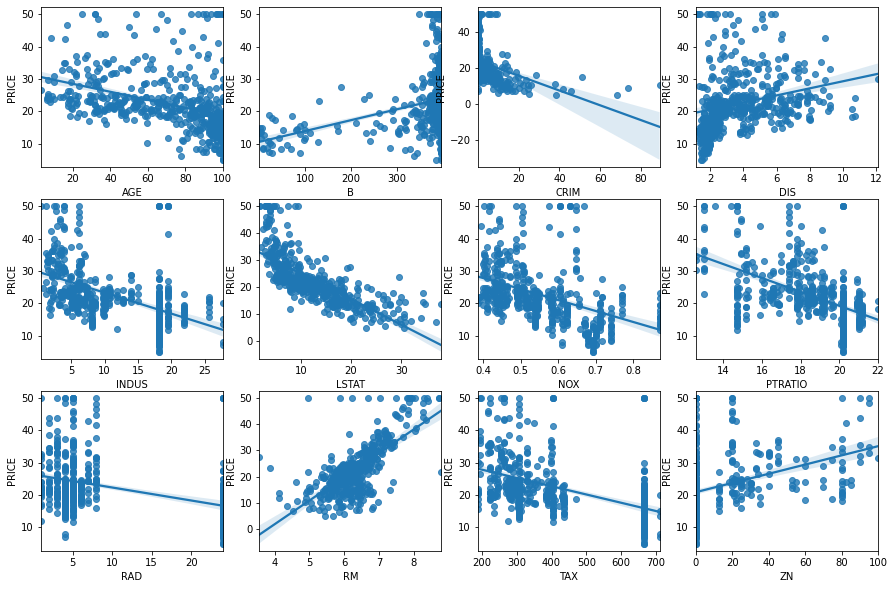

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#regplot: 산점도와 회귀선 동시에 그려줌


#canvas, 에 들어가는 개별 그림들
fig, axs = plt.subplots(figsize=(15,10), nrows=3, ncols=4)

#categorical 명목형
#전체 컬럼들에서 종속변수 및 불필요한 컬럼 뺀다
features=[f for f in list(boston_df.columns)[:-1] if f != "CHAS"]
features.sort()

for i, feature in enumerate(features):
    #현재 subplot의 행/열 번호를 갱신
    r=int(i/4)
    c=i%4
    #산점도와 회귀선
    sns.regplot(x=feature, y="PRICE", data=boston_df, ax=axs[r][c])

In [16]:
sklearn.__version__

'0.23.1'

In [14]:
sns.__version__

'0.10.1'

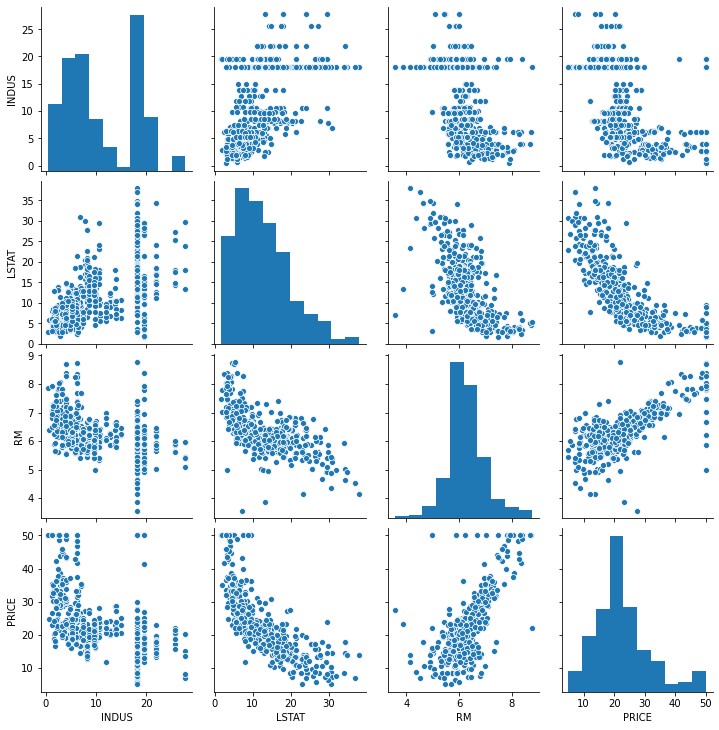

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#독립변수 선정
ccol=["INDUS", "LSTAT", "RM", "PRICE"]

#페어플롯
sns.pairplot(boston_df[ccol])

#또는 매개변수로 컬럼들 직접 선택
# sns.pairplot(boston_df, vars=ccol)

In [19]:
boston_df[ccol]

,INDUS,LSTAT,RM,PRICE
0,2.31,4.98,6.575,24.0
1,7.07,9.14,6.421,21.6
2,7.07,4.03,7.185,34.7
3,2.18,2.94,6.998,33.4
4,2.18,5.33,7.147,36.2
...,...,...,...,...
501,11.93,9.67,6.593,22.4
502,11.93,9.08,6.120,20.6
503,11.93,5.64,6.976,23.9
504,11.93,6.48,6.794,22.0


In [21]:
#dataframe cols 간의 correlation을 구한다
corrs=boston_df[ccol].corr()
corrs

,INDUS,LSTAT,RM,PRICE
INDUS,1.000000,0.603800,-0.391676,-0.483725
LSTAT,0.603800,1.000000,-0.613808,-0.737663
RM,-0.391676,-0.613808,1.000000,0.695360
PRICE,-0.483725,-0.737663,0.695360,1.000000


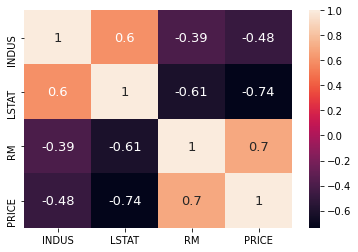

In [22]:
#히트맵
#annot: 웹 상에 값을 표시 여부
#annot_kws: 표시되는 값에 대한 추가 옵션
sns.heatmap(corrs, annot=True, annot_kws={"size":13})

0.6: 애매하긴 하지만 가져갈 순 있어  
만약 0.9라면 다중공선성 문제가 있어, 둘 중 하나는 빼야 한다. 이 때 어떤 변수를 뺼지 결정하기 위해 price컬럼도 넣은 것임. 종속변수에 영향을 더 많이 주는 것을 남겨야 한다.  
0.7: price는 종속변수라 뗄 수 없어. pass  

## 다중 선형 회귀 수행

### data 준비

In [23]:
X=boston_df.drop(["PRICE"], axis=1)
y=boston_df["PRICE"]

In [27]:
X_train, X_test, y_train, y_test = \
sklearn.model_selection.train_test_split(X,y,test_size=0.3, random_state=42)

In [40]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


### 최소제곱법으로 학습, 예측, 평가

In [33]:
import sklearn.linear_model as lm
import sklearn.metrics as mt
import numpy as np

In [34]:
lr=lm.LinearRegression()
reg=lr.fit(X_train, y_train)

In [35]:
y_pred=reg.predict(X_test)

In [39]:
#평가

mse=mt.mean_squared_error(y_test, y_pred)
print("MSE=", mse)
print("RMSE=", np.sqrt(mse))
print("R2=", mt.r2_score(y_test, y_pred))

MSE= 21.517444231177144
RMSE= 4.638689926172813
R2= 0.711226005748494


In [42]:
# 수정 결정 계수

n=len(X_train)  #OR y_train
k=len(X_train.columns)  #OR X_test

r2 = mt.r2_score(y_test, y_pred)
adj_r2 = 1 - (  (1-r2)*(n-1)/(n-k-1)  )
print("수정R2=", adj_r2)

수정R2= 0.70018464714476


In [43]:
reg.coef_

array([-1.33470103e-01,  3.58089136e-02,  4.95226452e-02,  3.11983512e+00,
       -1.54170609e+01,  4.05719923e+00, -1.08208352e-02, -1.38599824e+00,
        2.42727340e-01, -8.70223437e-03, -9.10685208e-01,  1.17941159e-02,
       -5.47113313e-01])

In [46]:
np.set_printoptions(suppress=True)

print(np.round(reg.coef_, 3))
print(np.round(reg.intercept_, 3))

np.set_printoptions(suppress=False)

[ -0.133   0.036   0.05    3.12  -15.417   4.057  -0.011  -1.386   0.243
  -0.009  -0.911   0.012  -0.547]
31.631


In [48]:
coefs=pd.Series(data=np.round(reg.coef_,3), index=X.columns)
coefs

CRIM       -0.133
ZN          0.036
INDUS       0.050
CHAS        3.120
NOX       -15.417
RM          4.057
AGE        -0.011
DIS        -1.386
RAD         0.243
TAX        -0.009
PTRATIO    -0.911
B           0.012
LSTAT      -0.547
dtype: float64

In [49]:
coefs_sort = coefs.sort_values(ascending=False)
coefs_sort

RM          4.057
CHAS        3.120
RAD         0.243
INDUS       0.050
ZN          0.036
B           0.012
TAX        -0.009
AGE        -0.011
CRIM       -0.133
LSTAT      -0.547
PTRATIO    -0.911
DIS        -1.386
NOX       -15.417
dtype: float64

다중 회귀는 일반적으로, 실제값/에측값 2차원 플롯을 그린다.

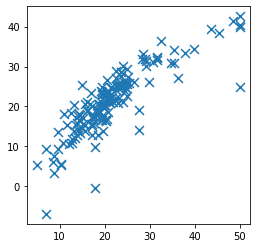

In [53]:
plt.figure(  figsize=(4,4)  )    #canvas 하나 만듦
plt.scatter(y_test, y_pred, marker="x", s=80)
#^:삼각형, s:네모, x:엑스
#s 옵션: 사이즈(inches)

## as statsmodels

In [54]:
import statsmodels.api as sm

#학습 or 예측할 때 add_constant 꼭 해야 돼
X_train = sm.add_constant(X_train)
reg=sm.OLS(y_train, X_train).fit()

X_test = sm.add_constant(X_test)
y_pred = reg.predict(X_test)

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           4.96e-92
Time:                        11:32:03   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6311      6.056      5.223      0.0

## 또 다른 데이터셋 practice
200716

In [55]:
import sklearn.datasets as d
# 함수 이름
dir(d)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

In [58]:
#당뇨병 발병률
diab = d.load_diabetes()
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [59]:
X = diab.data
y = diab.target

In [60]:
import sklearn.model_selection as ms

X_train, X_test, y_train, y_test = \
ms.train_test_split(X, y, test_size=0.3, random_state=2)

In [61]:
len(X_train)

309

In [62]:
len(X_test)

133

In [66]:
y_train[:50]

array([185.,  45., 199., 206.,  61., 139., 296., 281., 122.,  95.,  40.,
       127., 145., 108., 185.,  53., 132., 101., 263.,  94., 295., 259.,
       232., 124.,  77., 102.,  96.,  83., 263.,  71., 246.,  66., 115.,
       222.,  93., 129., 128., 163.,  99.,  92., 179., 140.,  94.,  97.,
       174.,  61., 202., 135.,  88., 152.])

In [67]:
import sklearn.linear_model as lm
lr=lm.LinearRegression()
reg=lr.fit(X_train, y_train)
y_pred=reg.predict(X_test)

In [72]:
import sklearn.metrics as mt

mse = mt.mean_squared_error(y_test, y_pred)
r2 = mt.r2_score(y_test, y_pred)
#OR r2=reg.score(X_test, y_test)

print("MSE=", mse)
print("R2=", r2)

MSE= 2919.750773950459
R2= 0.5012620528324085


In [74]:
n=len(X_train)
k=len(diab.feature_names)

n,k

(309, 10)

In [77]:
adj_r2 = 1 - ( (1-r2)*(n-1)/(n-k-1))
print("수정R2=",adj_r2)

수정R2= 0.48452588010866393


In [83]:
import pandas as pd
import numpy as np

coefs=pd.Series(np.round(reg.coef_,3), index=diab.feature_names)
ccc = coefs.sort_values(ascending=False)
print(ccc)

s5     799.479
s2     525.952
bmi    445.138
bp     376.355
s4     172.311
s3     106.400
s6      57.168
age    -31.805
sex   -214.672
s1    -802.452
dtype: float64


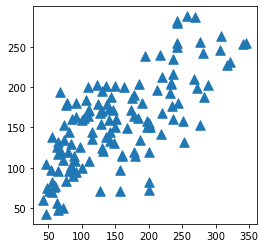

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(4,4))
plt.scatter(y_test, y_pred, marker="^", s=90)